In [74]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel, threshold_otsu
from skimage.segmentation import watershed, clear_border
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from skimage.feature import peak_local_max
from skimage.measure import label, regionprops
from skimage.morphology import remove_small_objects, opening, square, rectangle, closing

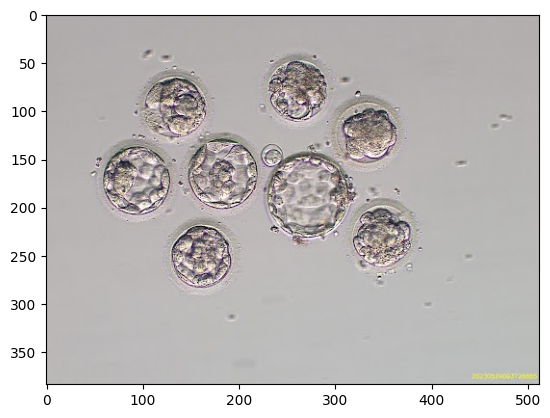

In [3]:
image = imread('1.jpg')
plt.imshow(image)

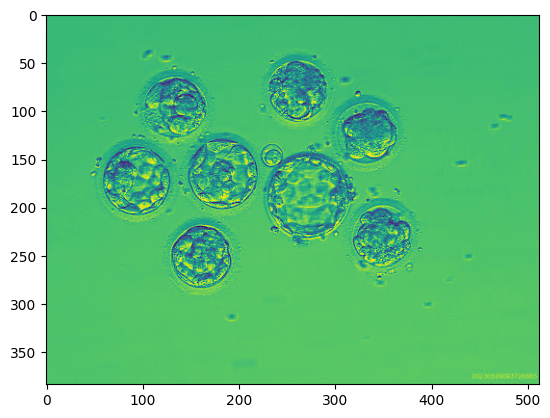

In [5]:
gray = rgb2gray(image)
plt.imshow(gray)

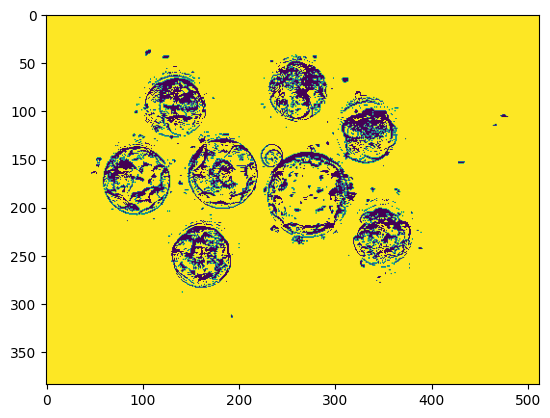

In [38]:
thresh = threshold_otsu(gray)
binary = gray > thresh
plt.imshow(binary)

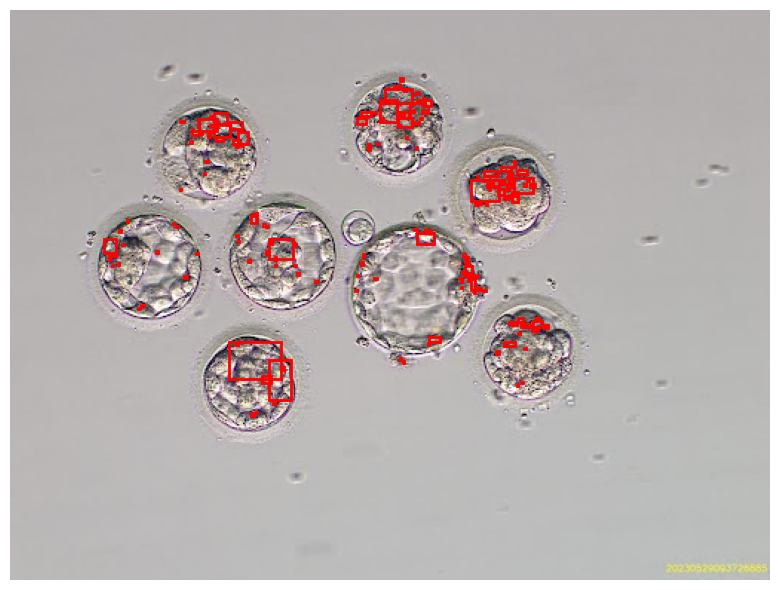

In [43]:
cleared = clear_border(binary)

 # Label the cleared regions
label_image = label(cleared)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image)
for region in regionprops(label_image):
        
        # Draw rectangle around segmented region
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

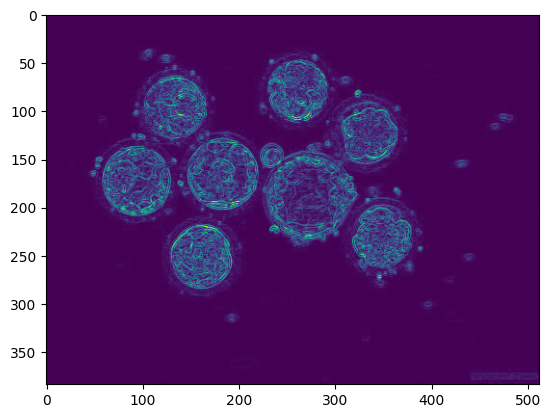

In [11]:
edges = sobel(gray) # Find edges
plt.imshow(edges)

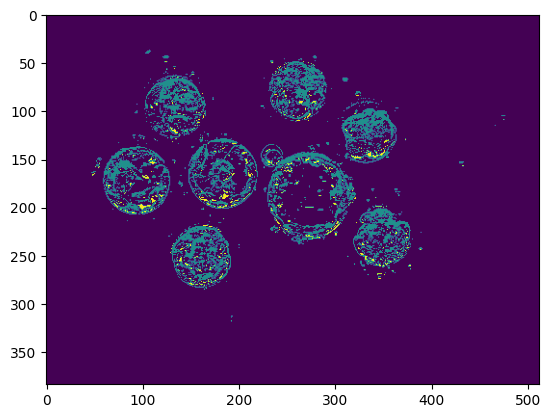

In [12]:
markers = np.zeros_like(gray) # Find markers/edge threshold
# markers[gray < 0.1] = 1
# markers[gray > 0.9] = 2
markers[gray < 0.5] = 1
markers[gray > 0.9] = 2
plt.imshow(markers)

In [22]:
coordinates = peak_local_max(edges, footprint=np.ones((3, 3)), labels=gray.astype(bool))
# markers = label(coordinates)
# Convert coordinates to a marker image
markers_image = np.zeros(gray.shape, dtype=int)
for marker_num, (i, j) in enumerate(coordinates, start=1):
    markers_image[i, j] = marker_num

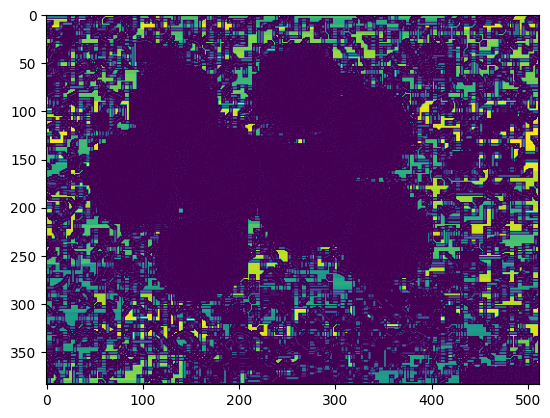

In [23]:
plt.imshow(markers_image)

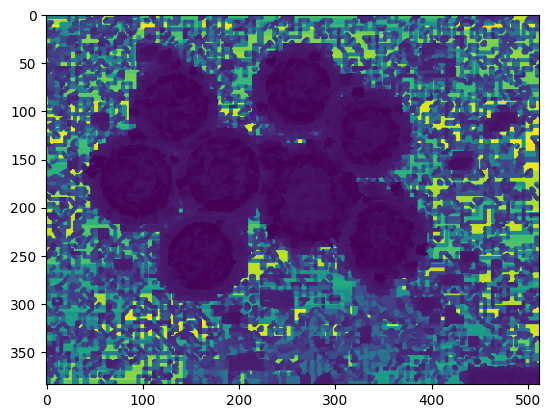

In [35]:
segmentation = watershed(-edges, markers_image, mask=gray)
plt.imshow(segmentation)

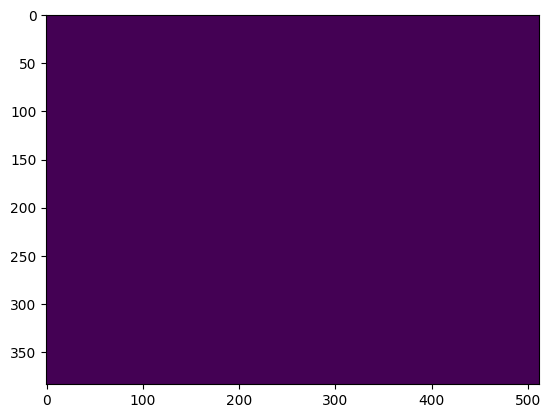

In [32]:
cleaned = remove_small_objects(segmentation, min_size=500)
plt.imshow(cleaned)

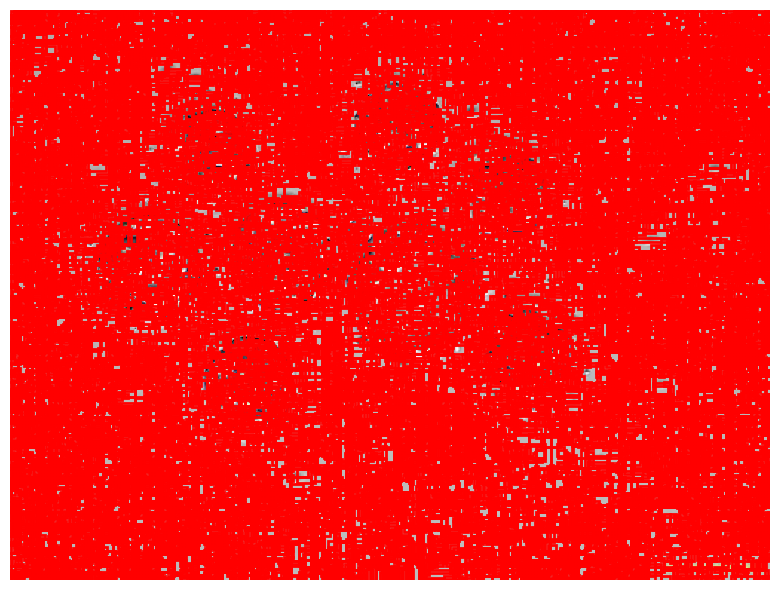

In [36]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(image)
for region in regionprops(segmentation):
    # Draw rectangle around segmented region
    minr, minc, maxr, maxc = region.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
ax.set_axis_off()
plt.tight_layout()
plt.show()

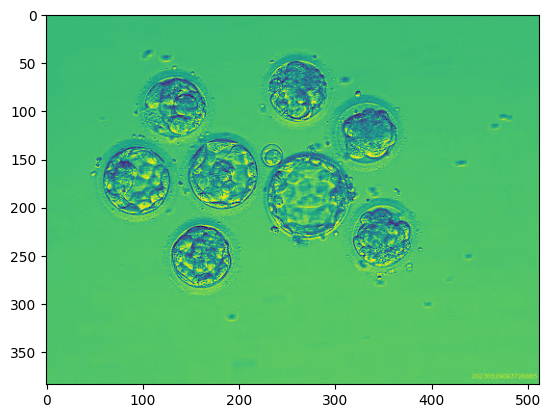

In [46]:
image = imread('1.jpg')
gray = rgb2gray(image)
gray = (gray * 255).astype(np.uint8)
plt.imshow(gray)

In [47]:
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

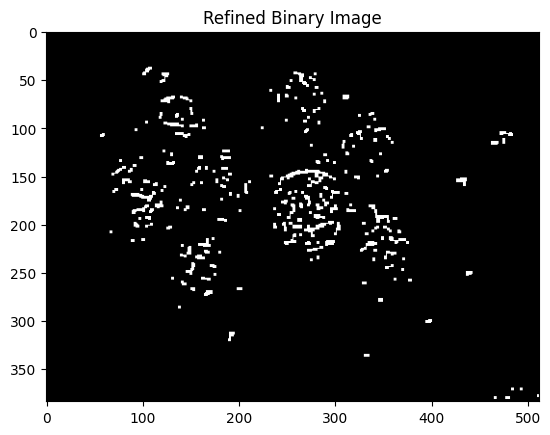

In [52]:
refined = opening(binary, square(3))
refined = closing(refined, square(3))
plt.figure()
plt.title("Refined Binary Image")
plt.imshow(refined, cmap='gray')

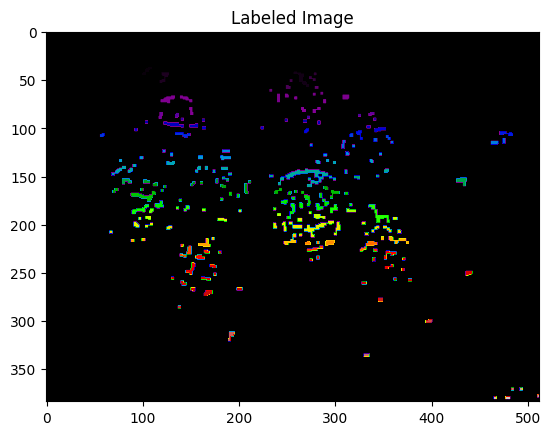

In [53]:
labeled = label(refined)
plt.figure()
plt.title("Labeled Image")
plt.imshow(labeled, cmap='nipy_spectral')

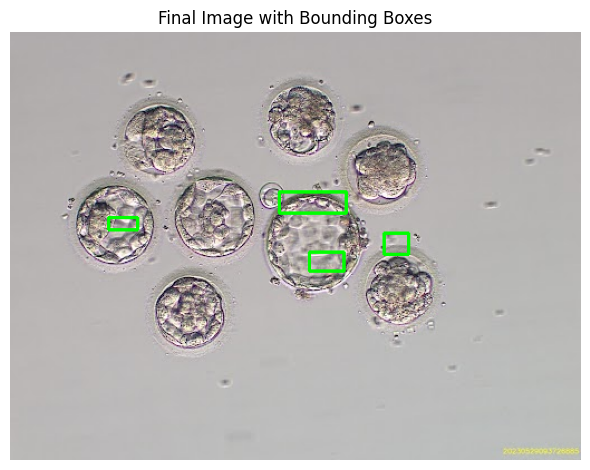

In [56]:
props = regionprops(labeled)

for prop in props:
        if prop.area > 100:  # Just an example, adjust as needed
            minr, minc, maxr, maxc = prop.bbox
            cv2.rectangle(image, (minc, minr), (maxc, maxr), (0, 255, 0), 2)  # Green bounding box
    
plt.figure()
plt.title("Final Image with Bounding Boxes")
plt.imshow(image)
plt.axis('off')
plt.tight_layout()
plt.show()

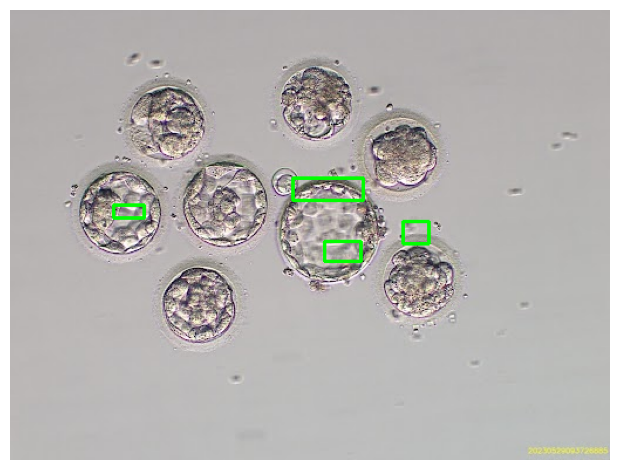

In [59]:
valid_regions = [prop for prop in props if prop.area > 100]
image = imread('1.jpg')
for prop in valid_regions:
        minr, minc, maxr, maxc = prop.bbox
        cv2.rectangle(image, (minc, minr), (maxc, maxr), (0, 255, 0), 2)  # Green bounding box

    
plt.imshow(image)
plt.axis('off')
plt.tight_layout()
plt.show()

In [61]:
image = imread('1.jpg')
    
# Convert to HSV color space
hsv = rgb2hsv(image)
h, s, v = cv2.split(hsv)
    
# Enhance the contrast of the V channel using histogram equalization
v_eq = cv2.equalizeHist((v * 255).astype(np.uint8))
enhanced_hsv = cv2.merge([h, s, v_eq / 255.0])
enhanced_rgb = hsv2rgb(enhanced_hsv)
    
gray = rgb2gray(enhanced_rgb)
gray = (gray * 255).astype(np.uint8)

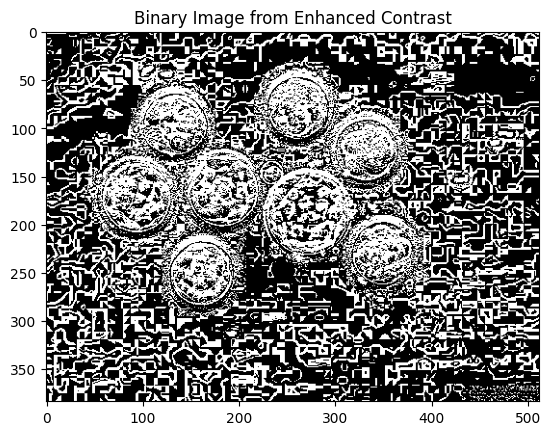

In [62]:
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

plt.figure()
plt.title("Binary Image from Enhanced Contrast")
plt.imshow(binary, cmap='gray')

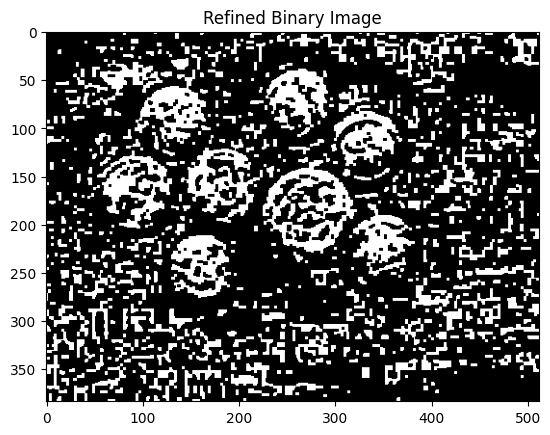

In [63]:
refined = opening(binary, square(3))
refined = closing(refined, square(3))
plt.figure()
plt.title("Refined Binary Image")
plt.imshow(refined, cmap='gray')

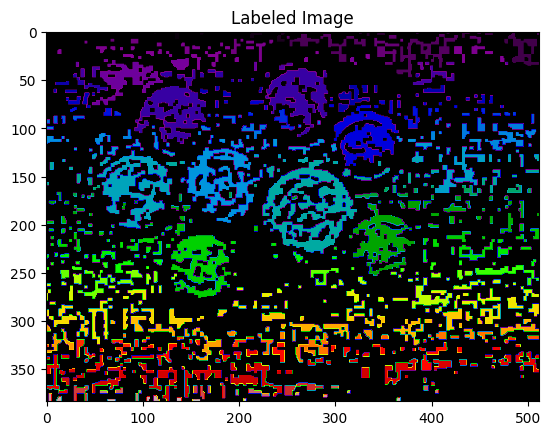

In [64]:
labeled = label(refined)
plt.figure()
plt.title("Labeled Image")
plt.imshow(labeled, cmap='nipy_spectral')

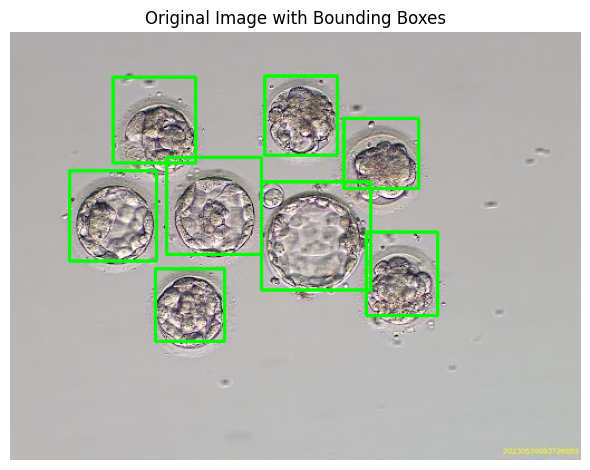

In [71]:
props = regionprops(labeled)
image = imread('1.jpg')
for prop in props:
        if prop.area > 1500:
            minr, minc, maxr, maxc = prop.bbox
            cv2.rectangle(image, (minc, minr), (maxc, maxr), (0, 255, 0), 2)
    
plt.figure()
plt.title("Original Image with Bounding Boxes")
plt.imshow(image)
plt.axis('off')
plt.tight_layout()
plt.show()

In [82]:
def segment(image_path):
    # Load image
    image = imread(image_path)
    
    # Convert to HSV color space
    hsv = rgb2hsv(image)
    h, s, v = cv2.split(hsv)
    
    # Enhance the contrast of the V channel using histogram equalization
    v_eq = cv2.equalizeHist((v * 255).astype(np.uint8))
    enhanced_hsv = cv2.merge([h, s, v_eq / 255.0])
    enhanced_rgb = hsv2rgb(enhanced_hsv)
    
    gray = rgb2gray(enhanced_rgb)
    gray = (gray * 255).astype(np.uint8)
    
    # Preprocessing using adaptive thresholding
    binary = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
    )

    # Morphological operations to refine the binary image
    refined = opening(binary, square(3))
    refined = closing(refined, square(3))
    
    # Labeling
    labeled = label(refined)

    props = regionprops(labeled)

    # Draw bounding boxes on the original image
    for prop in props:
        if prop.area > 1500:
            minr, minc, maxr, maxc = prop.bbox
            cv2.rectangle(image, (minc, minr), (maxc, maxr), (0, 255, 0), 2)
    
    # Display the results
    plt.figure()
    plt.title("Original Image with Bounding Boxes")
    plt.imshow(image)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

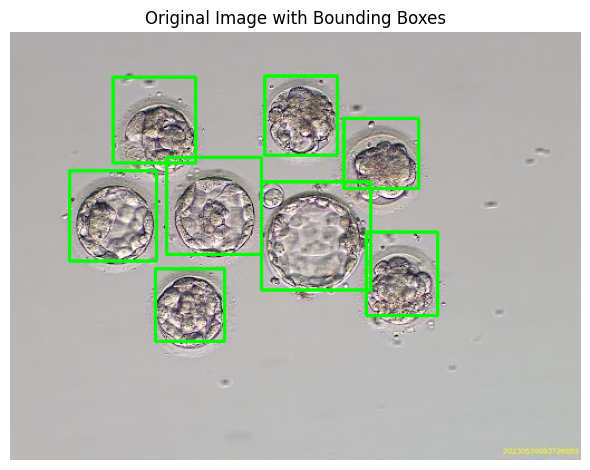

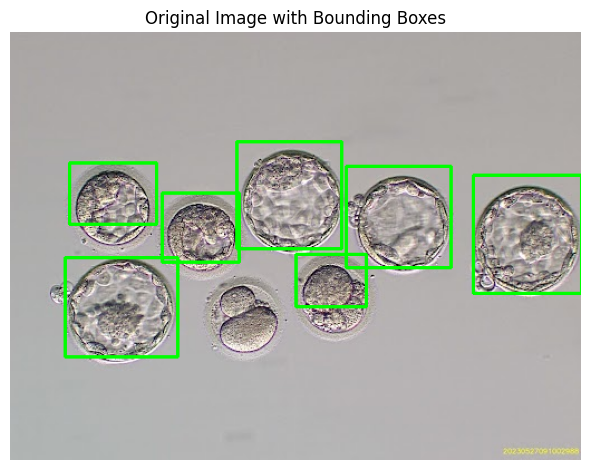

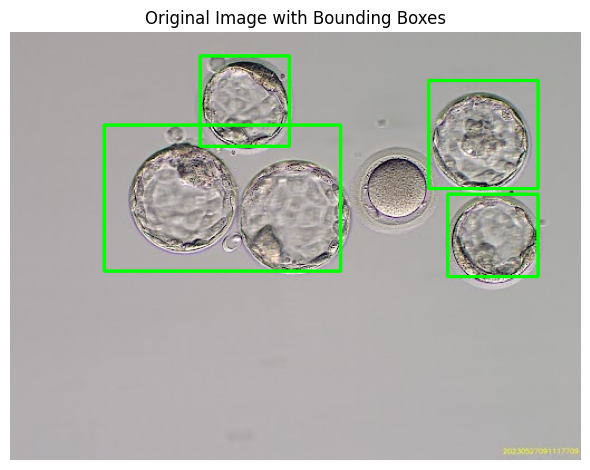

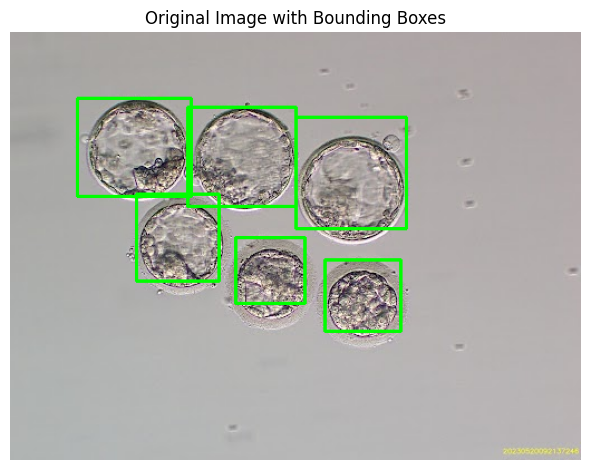

In [86]:
image_paths = [os.path.join(os.getcwd(), f"{i}.jpg") for i in range(1, 5)]
for image_path in image_paths:
        segment(image_path)
